In [8]:
#這次使用sklearn資料庫的內建資料
import pandas as pd
from sklearn.datasets import load_boston
data = load_boston()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = pd.DataFrame(data['target'], columns = ['MEDV'])
df = pd.concat([X, y], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


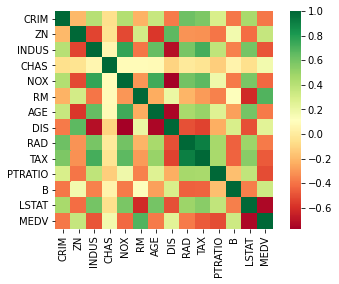

In [9]:
#這次用headmap來做EDA
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [19]:
#將資料放入基本的linear regression模型
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df.drop('MEDV', axis = 1).values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

reg = LinearRegression()

reg.fit(X_train, y_train)

pred = reg.predict(X_test)

#計算線性回歸常用的評估指標R^2和RMSE

print('R Square:{}'.format(reg.score(X_test,y_test)))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE:{}'.format(rmse))

R Square:0.711226005748496
RMSE:4.638689926172797


In [20]:
#使用cross_validation來評估模型

from sklearn.model_selection import cross_val_score

cv = cross_val_score(reg, X, y, cv = 5)
print(cv)
print('Average cv score:{}'.format(np.mean(cv)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average cv score:0.3532759243958772


[-0.09789363  0.04921111 -0.03661906  0.95519003 -0.          3.70320175
 -0.01003698 -1.16053834  0.27470721 -0.01457017 -0.77065434  0.01024917
 -0.56876914]


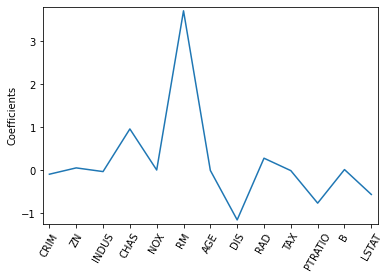

In [27]:
#使用lasso來計算相關係數及找出重要的特徵

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso.fit(X, y)

lasso_coef = lasso.fit(X,y).coef_

print(lasso_coef)

import matplotlib.pyplot as plt
df_columns = df.drop('MEDV', axis = 1).columns
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.ylabel('Coefficients')
plt.margins(0.02)
plt.show()

#可以看到在這個資料中，RM(房間數)是相當重要的特徵
